<a href="https://colab.research.google.com/github/massimocipressi/MLPNS_MCipressi/blob/main/MPLNS_4_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pylab as pl
import scipy as sp
from scipy.spatial.distance import cdist #cdist calcola la distanza di un punto da tutti gli altri

In [3]:
np.random.seed(166)
#facciamo 100 punti in uno spazio 2D distribuiti normalmente
data = np.random.randn(100,2)
#devo creare anche la label
labels = np.random.randint(0,2,100)
labels

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

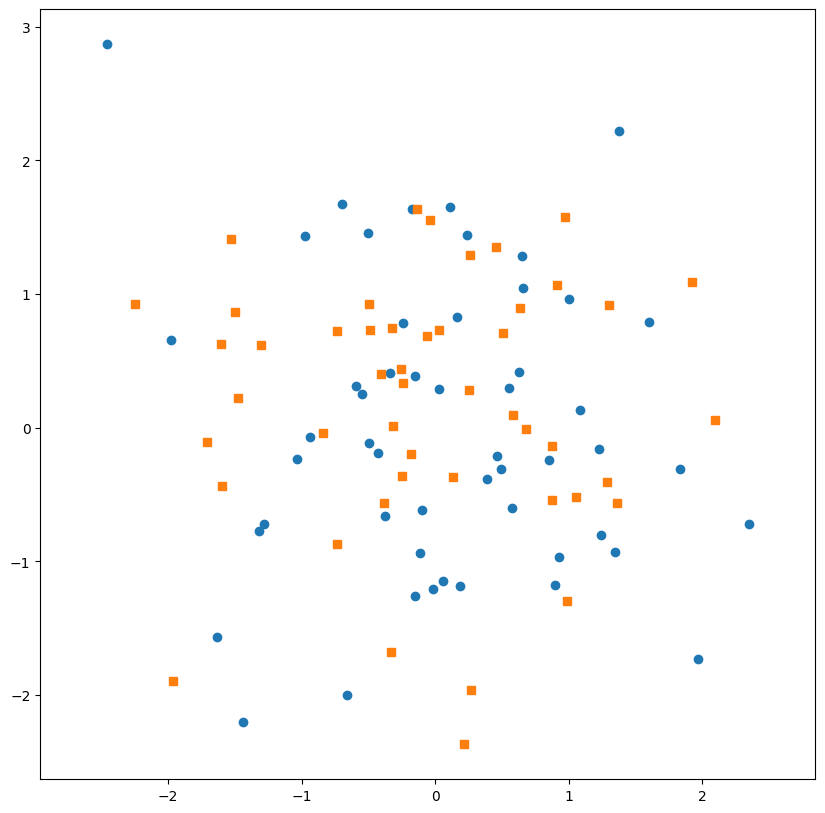

In [7]:
ax = pl.figure(figsize = (10,10)).add_subplot(111)
ax.axis("equal")
ax.plot(data[:,0][labels==0],data[:,1][labels==0],'o');
ax.plot(data[:,0][labels==1],data[:,1][labels==1],'s');

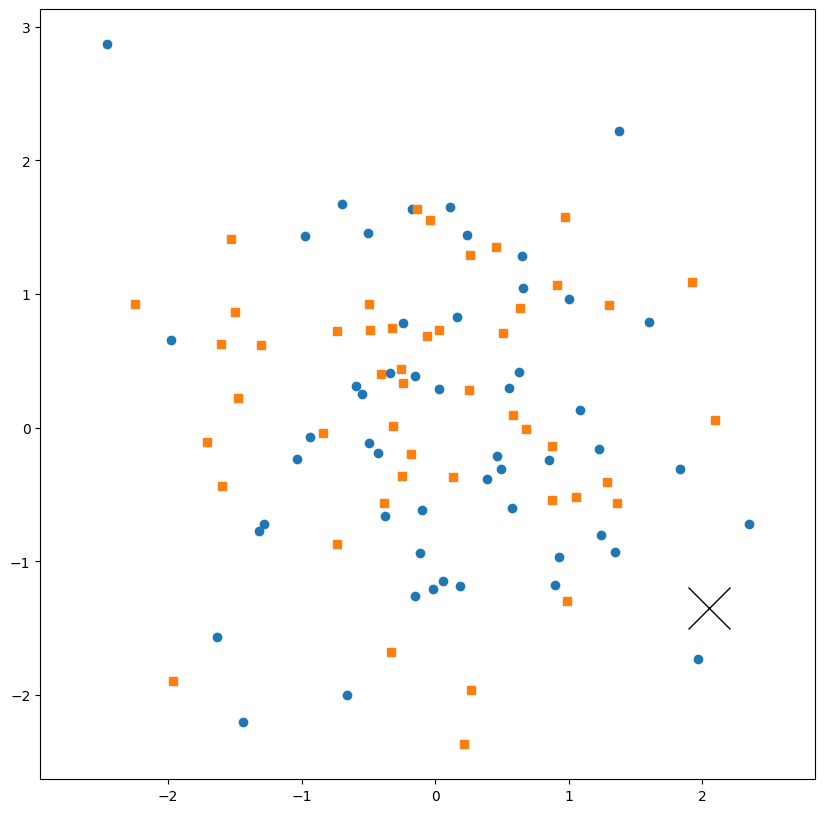

In [26]:
testparticle = np.random.randn(2)
ax = pl.figure(figsize = (10,10)).add_subplot(111)
ax.axis("equal")
ax.plot(data[:,0][labels==0],data[:,1][labels==0],'o');
ax.plot(data[:,0][labels==1],data[:,1][labels==1],'s');
ax.plot(testparticle[0],testparticle[1],'kx',ms=30,lw=3);

In [27]:
#cdist fa distanza fra cose strutturate uguali, per rendere la mia particella 2D faccio
d = cdist(np.atleast_2d(testparticle), data)

In [28]:
k = 1
#argmin mi dà la posizione del minimo
labeltest = labels[np.argmin(d)]

<ipython-input-30-649df855d6ef>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "kx" (-> color='k'). The keyword argument will take precedence.
  ax.plot(testparticle[0],testparticle[1],'kx',ms=30,lw=3,color=colors[labeltest]);


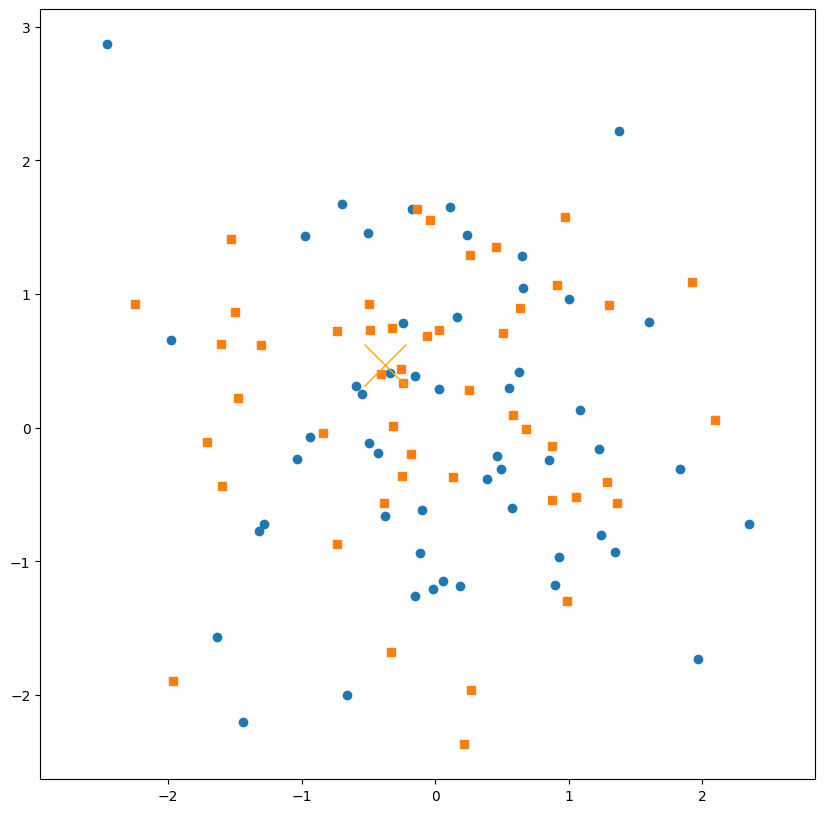

In [30]:
testparticle = np.random.randn(2)

d = cdist(np.atleast_2d(testparticle), data)
labeltest = labels[np.argmin(d)]

ax = pl.figure(figsize = (10,10)).add_subplot(111)
ax.axis("equal")
colors = ["blue","orange"]
ax.plot(data[:,0][labels==0],data[:,1][labels==0],'o');
ax.plot(data[:,0][labels==1],data[:,1][labels==1],'s');
ax.plot(testparticle[0],testparticle[1],'kx',ms=30,lw=3,color=colors[labeltest]);

In [31]:
d = cdist(np.atleast_2d(testparticle), data)
k = 5
nns = data[np.argsort(d)][0][:k]
nns

array([[-0.40789039,  0.40549266],
       [-0.33905336,  0.40843881],
       [-0.2587103 ,  0.44297307],
       [-0.23993534,  0.33433674],
       [-0.15372315,  0.38542201]])

In [32]:
nnslabel = labels[np.argsort(d)][0][:k]
nnslabel

array([1, 0, 1, 1, 0])

In [33]:
labeltest2 = 0 if (nnslabel == 0).sum() > (nnslabel == 1).sum() else 1

<ipython-input-35-0dc3fd76f7ee>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "kx" (-> color='k'). The keyword argument will take precedence.
  ax.plot(testparticle[0],testparticle[1],'kx',ms=30,lw=3,color=colors[labeltest2]);


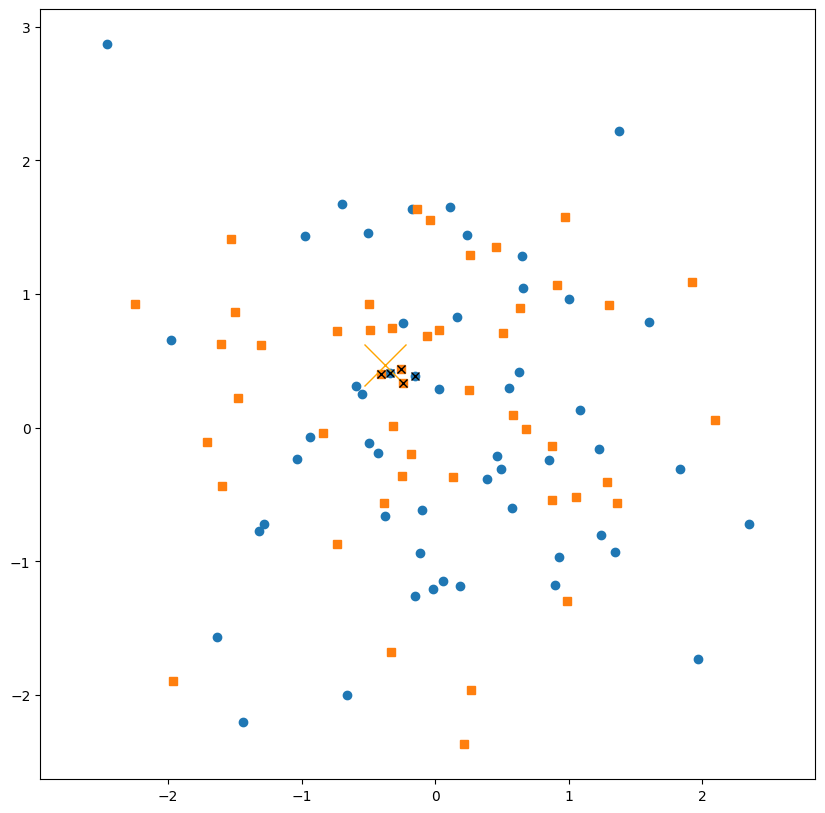

In [35]:
ax = pl.figure(figsize = (10,10)).add_subplot(111)
ax.axis("equal")
colors = ["blue","orange"]
ax.plot(data[:,0][labels==0],data[:,1][labels==0],'o');
ax.plot(data[:,0][labels==1],data[:,1][labels==1],'s');
ax.plot(testparticle[0],testparticle[1],'kx',ms=30,lw=3,color=colors[labeltest2]);
ax.plot(nns[:,0],nns[:,1],'kx')